In [88]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [97]:
import numpy as np
import pandas as pd
X, y= mnist['data'], mnist['target']
y = y.astype(np.uint8)

In [107]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
X_trainM = X_train.copy()
print(X_train.iloc[3424][536:])
class image_shifter():
    def __init__(self, data, direction):
        self.data = data
        self.direction = direction
        self.cl = list(data.columns)

    def shiftImage(self):
        for index, row in self.data.iterrows():
            for i in range(len(self.cl)):
                if(i <= 27):
                    row[self.cl[i]] = 0.0
                elif i + 27 < len(self.cl):
                    row[self.cl[i]] = row[self.cl[i+27]]
            
IS = image_shifter(X_trainM, "up")
IS.shiftImage()

pixel537    251.0
pixel538    251.0
pixel539    236.0
pixel540    190.0
pixel541    131.0
            ...  
pixel780      0.0
pixel781      0.0
pixel782      0.0
pixel783      0.0
pixel784      0.0
Name: 3424, Length: 248, dtype: float64


In [4]:
#5-detector
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)

from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [5]:
sgd_clf.predict(X[:1])

array([ True])

In [6]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [7]:
from sklearn.base import BaseEstimator

class not_5(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool)

In [8]:
never_5_clf = not_5()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [9]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [11]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_5, y_train_pred), recall_score(y_train_5, y_train_pred))

0.8370879772350012 0.6511713705958311


In [12]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [19]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [20]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown

In [23]:
thresholds_90_predictions = thresholds[np.argmax(precisions >= 0.90)]
print(thresholds_90_predictions)
y_train_90 = (y_scores >= thresholds_90_predictions)
recall_90_precision = recall_score(y_train_5, y_train_90)
print(precision_score(y_train_5, y_train_90))

3370.0194991439557
0.9000345901072293


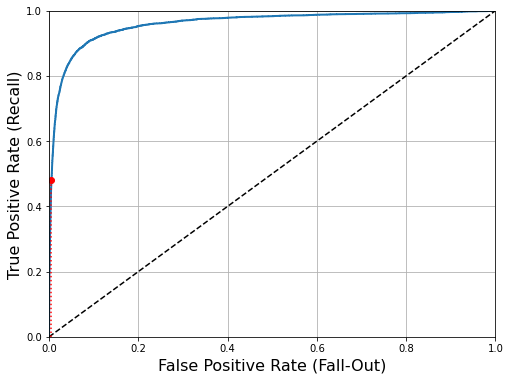

In [25]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown                            # Not shown
plt.show()

In [26]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
y_probas = cross_val_predict(rf_clf, X_train, y_train_5, cv=3, method='predict_proba')

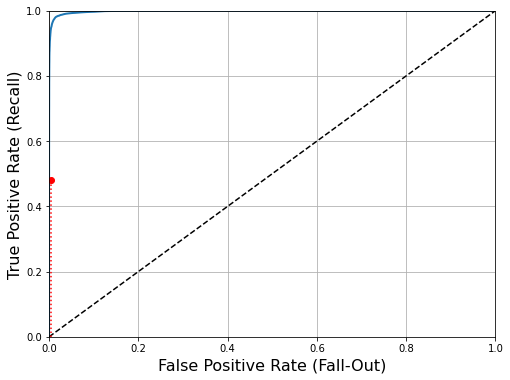

In [29]:
y_scores = y_probas[:,1]
fpr_forest, tpr_forest, thresholds = roc_curve(y_train_5, y_scores)

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr_forest, tpr_forest)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown                            # Not shown
plt.show()

In [31]:
roc_auc_score(y_train_5, y_scores)

0.9983436731328145

In [32]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

SVC()

In [36]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scalar = StandardScaler()
knn = KNeighborsClassifier()
X_scaled_train = scalar.fit_transform(X_train.astype(np.float64))
# in MNIST, the white pixels on the borders of the image have very little variance, and their values are zero or close to zero. 
# Without scaling, they're very likely to be completely ignored by the model, and that's actually a good thing, because they don't really matter at all. 
# But with scaling, these pixels add basically just noise, and they hurt the model's performance.

params = [
    {"weights" : ['uniform', 'distance'], "n_neighbors" : [3, 4, 5]}
]

grid_search = GridSearchCV(knn, param_grid=params, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'n_neighbors': 4, 'weights': 'distance'}
0.9716166666666666


In [43]:
from sklearn.metrics import accuracy_score
y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.9714